# 1. Intro to Linear Algebra

## 1.1 Scalars, Vectors, Matrices and Tensors

Basic definitions:

- A scalar is a single number or a matrix with a single entry.
- A vector is a 1-D array of numbers. Another way to think of vectors is identifying points in space with each element giving the coordinate along a different axis.

$$
{x} =\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
$$

- A matrix is a 2-D array where each element is identified by two indices (ROW then COLUMN).

$$
{A}=
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
$$

- A tensor is a $n$-dimensional array with $n>2$

$$
{B}=
\begin{bmatrix}
    \begin{bmatrix}
        A_{0,1,1} & A_{0,1,2} & \cdots & A_{0,1,n} \\\\
        A_{0,2,1} & A_{0,2,2} & \cdots & A_{0,2,n} \\\\
        \cdots & \cdots & \cdots & \cdots \\\\
        A_{0,m,1} & A_{0,m,2} & \cdots & A_{0,m,n}
    \end{bmatrix}
    ...
    \begin{bmatrix}
        A_{k,1,1} & A_{k,1,2} & \cdots & A_{k,1,n} \\\\
        A_{k,2,1} & A_{k,2,2} & \cdots & A_{k,2,n} \\\\
        \cdots & \cdots & \cdots & \cdots \\\\
        A_{k,m,1} & A_{k,m,2} & \cdots & A_{k,m,n}
    \end{bmatrix}
\end{bmatrix}
$$

- In the following code section, we will use the Python Image Library (PIL) or Pillow, and NumPy to manipulate an image in the form of an array.

## Report

1-1-1.(15%) Please specify the color space and shape of given image.

1-1-2.(15%) Please show the pixel value of (222, 222).


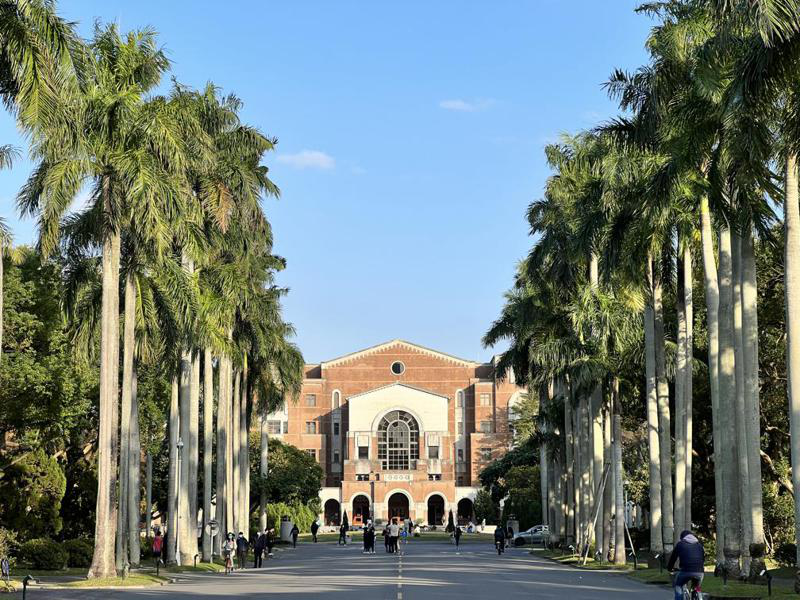

Color space = RGB
Shape= (600, 800, 3)
Pixel value of (222, 222) = [241 199 157]


In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive/')
# path = '/content/gdrive/MyDrive/ntu.JPG'

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the image from working directory
# Upload the image using the files tab on the left hand side 
image = Image.open('ntu.JPG')

# show the image
display(image)

# summarize some details about the image
# print the image format, size and mode. 
# For example, to print the format of the image do "print(image.format)"
print("Color space =",image.mode)


# convert the image to a numpy array
image = np. array(image)

# print the shape of data
print("Shape=",image.shape)

# basic array syntax
'''
A = np.array([[0, 1, 2, 3], 
              [4, 5, 6, 7], 
              [8, 9, 10, 11]])
print(A.shape)
print(A[0, :])
print(A[:, 0])
print(A[:, :])
'''


# print the pixel value of (222, 222)
print("Pixel value of (222, 222) =",image[222, 222])


# 1.2 Addition

Matrices can be added if they have the same shape:

$${A} + {B} = {C}$$

Each cell of ${A}$ is added to the corresponding cell of ${B}$:

$${A}_{i,j} + {B}_{i,j} = {C}_{i,j}$$

$i$ is the row index and $j$ the column index.

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} \\\\
    A_{2,1} & A_{2,2} \\\\
    A_{3,1} & A_{3,2}
\end{bmatrix}+
\begin{bmatrix}
    B_{1,1} & B_{1,2} \\\\
    B_{2,1} & B_{2,2} \\\\
    B_{3,1} & B_{3,2}
\end{bmatrix}=
\begin{bmatrix}
    A_{1,1} + B_{1,1} & A_{1,2} + B_{1,2} \\\\
    A_{2,1} + B_{2,1} & A_{2,2} + B_{2,2} \\\\
    A_{3,1} + B_{3,1} & A_{3,2} + B_{3,2}
\end{bmatrix}
$$

The shape of ${A}$, ${B}$ and ${C}$ are equal

## Report

1-2-1.(15%) Please specify the shape of ```image_gray``` 

1-2-2.(15%) Please show the output image of ```image_gray```

Shape= (600, 800)


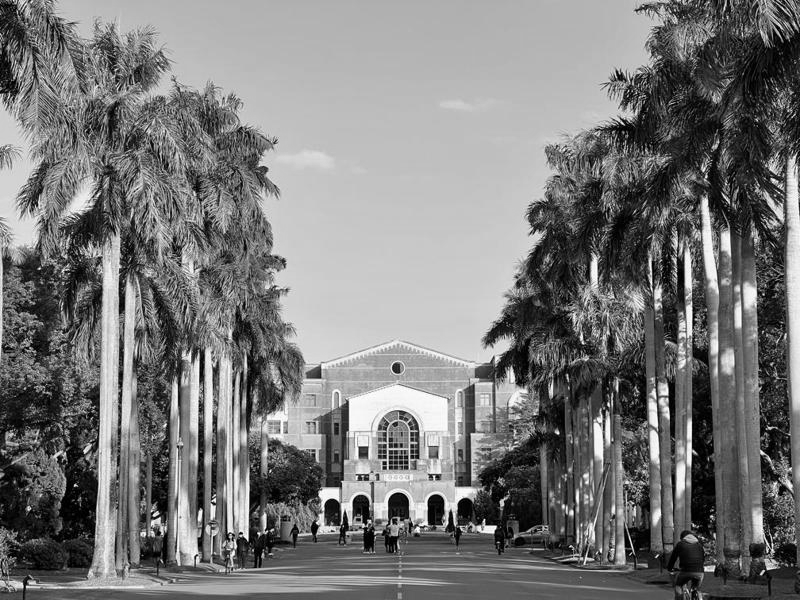

In [2]:
# convert the image into grayscale using 0.2989*R + 0.5870*G + 0.1140*B 
image_gray = 0.2989*image[:,:,0]+0.5870*image[:,:,1]+0.1140*image[:,:,2]

# convert to int
image_gray = np.uint8(image_gray)

# print image_gray shape
print("Shape=",image_gray.shape)

# convert to Pillow image with single channel 
image_gray = Image.fromarray(image_gray, 'L')
display(image_gray)
image_gray.save('gray.png')

# 1.3 Dot product

$$
C_{i,j} = A_{i,k}B_{k,j} = \sum_{k}A_{i,k}B_{k,j}
$$

You can find more examples about the dot product [here](https://www.mathsisfun.com/algebra/matrix-multiplying.html).


## Report

3-1.(40%) Please make the ```image_gray``` brighter and darker, and show these 2 images.

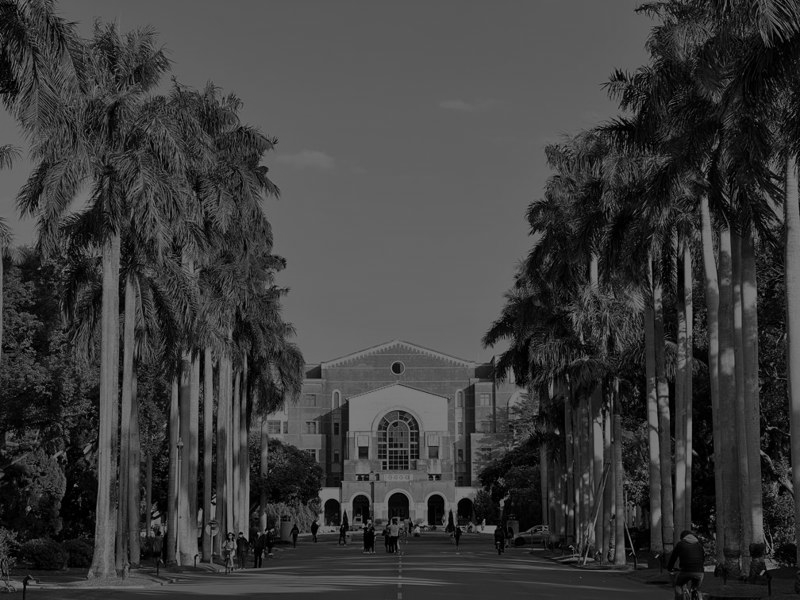

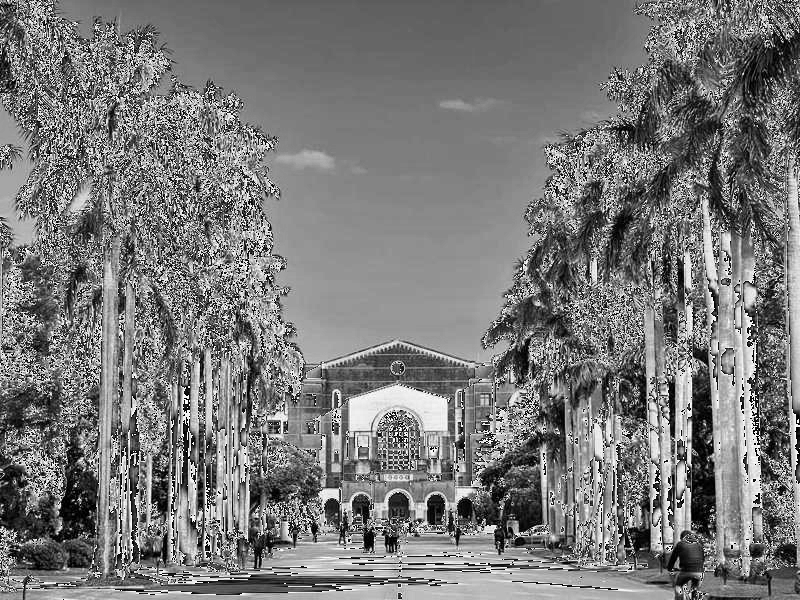

In [3]:
# convert the image into grayscale using 0.2989*R + 0.5870*G + 0.1140*B with dot product np.dot or @
image_gray2 = 0.2989*image[:,:,0]+0.5870*image[:,:,1]+0.1140*image[:,:,2]
image_gray2 = np.uint8(image_gray2)

# make image brighter and darker by multiplying and dividing the pixel value
image_gray_dark = image_gray2/2
image_gray_bright = 2*image_gray2

# if the pixel value larger than 255, set the pixel value to 255
for x in range(image_gray2.shape[0]):
    for y in range(image_gray2.shape[1]):
        if image_gray_bright[x, y] > 255:
            image_gray_bright[x, y] = 255


image_gray_dark = Image.fromarray(np.uint8(image_gray_dark), 'L')
display(image_gray_dark)
image_gray_dark.save('gray_dark.png')

image_gray_bright = Image.fromarray(np.uint8(image_gray_bright), 'L')
display(image_gray_bright)
image_gray_bright.save('gray_bright.png')


# note that the dimension of pillow image and numpy array are different

# 1.4 ( BONUS！)Translation, scaling and rotation


Translation using Matrices
$$
P' = P + t = (x + t_x, y + t_y) \\\\
P' \to
\begin{bmatrix}
    x + t_x \\\\
    y + t_y 
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 & t_x \\\\
    0 & 1 & t_y 
\end{bmatrix}
\begin{bmatrix}
    x \\\\
    y \\\\
    1 
\end{bmatrix}
$$

Scaling Equation using Matrices
$$
P' \to
\begin{bmatrix}
    s_xx  \\\\
    s_yy  \\\\
    1  
\end{bmatrix}
=
\begin{bmatrix}
    s_x & 0 & 0 \\\\
    0 & s_y & 0 \\\\
    0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
    x \\\\
    y \\\\
    1 
\end{bmatrix}
$$
Rotation using Matrices
$$
P' \to
\begin{bmatrix}
    xcos\theta-ysin\theta  \\\\
    xsin\theta+ycos\theta  \\\\
    1  
\end{bmatrix}
=
\begin{bmatrix}
    cos\theta & -sin\theta & 0 \\\\
    sin\theta & cos\theta & 0 \\\\
    0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
    x \\\\
    y \\\\
    1 
\end{bmatrix}
$$


## Report

1-4.(25%) Please rotate the image by 45 degrees without any package and show the output image.

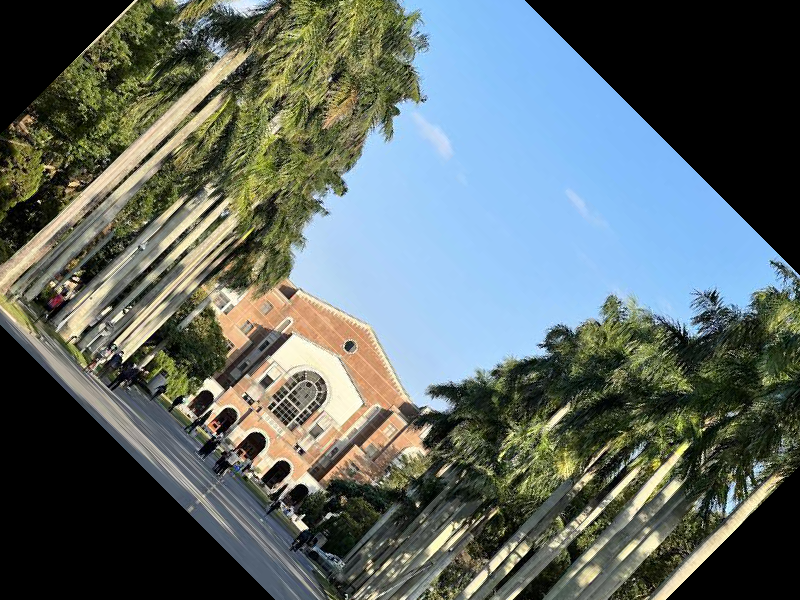

In [6]:
# Rotate the image by 45 degree(clockwise)
# calling the rotate function is prohibited, please change the value pixel by pixel
from PIL import Image
import numpy as np
image = Image.open('ntu.JPG')
image_r = image.rotate(-45) 
display(image_r)

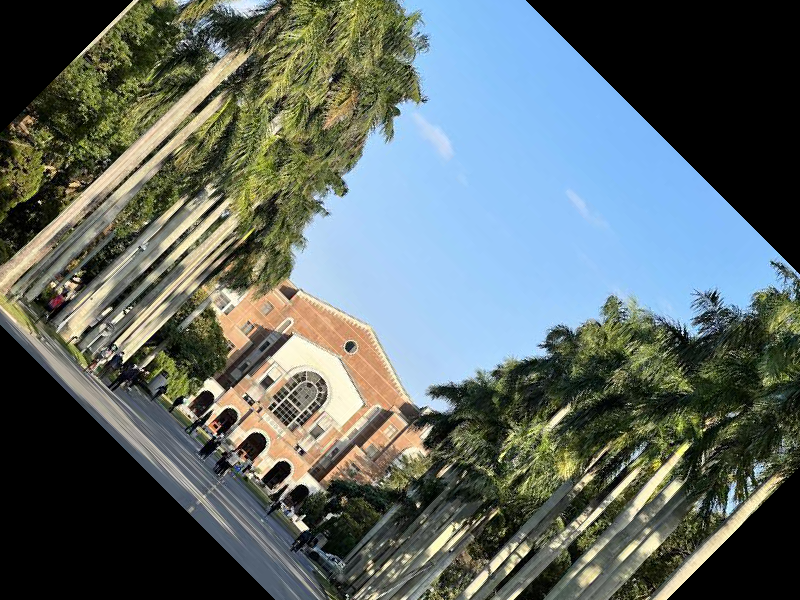

In [77]:
import math
image = Image.open('ntu.JPG')

# convert the image to a numpy array
image = np. array(image)
rotate_image = np.zeros(image.shape,dtype=np.uint8)
theta=45/180*math.pi
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        x=int(math.cos(theta)*(i-image.shape[0]/2)-math.sin(theta)*(j-image.shape[1]/2)+image.shape[0]/2)
        y=int(math.sin(theta)*(i-image.shape[0]/2)+math.cos(theta)*(j-image.shape[1]/2)+image.shape[1]/2)
        
        if 0<=x and x<image.shape[0]:
            if 0<=y and y<image.shape[1]:
                rotate_image[i,j,:]=image[x,y,:]

rotate_image = Image.fromarray(rotate_image, 'RGB')
display(rotate_image)        
            
